<a href="https://colab.research.google.com/github/falawar7/AAI_631O/blob/main/Week2/FE_Practical_Exercise__Wrangling_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/falawar7/AAI_631O/refs/heads/main/Week2/CountryExpenditures_WideFormat.csv")

In [ ]:
data.head()

,Country,Currency,2000,2001,2002,2003,2004,2005,2006,2007
0,Albania,lek,4.450370e+11,4.530370e+11,5.065490e+11,5.857190e+11,6.520190e+11,6.920360e+11,NaN,NaN
1,Argentina,Argentine peso,2.287150e+11,2.169190e+11,1.890870e+11,2.022650e+11,2.191520e+11,2.377190e+11,2.552470e+11,NaN
2,Armenia,dram,1.155660e+12,1.222820e+12,1.338670e+12,1.449340e+12,1.630640e+12,1.893990e+12,2.031750e+12,2.484910e+12
3,Australia,Australian dollar,5.550610e+11,5.803190e+11,6.013530e+11,6.480720e+11,6.855500e+11,7.114790e+11,7.482680e+11,NaN
4,Austria,1999 ATS euro / euro,1.528420e+11,1.536990e+11,1.545300e+11,1.564510e+11,1.644940e+11,1.678000e+11,1.713220e+11,1.741800e+11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   130 non-null    object 
 1   Currency  130 non-null    object 
 2   2000      126 non-null    float64
 3   2001      127 non-null    float64
 4   2002      127 non-null    float64
 5   2003      125 non-null    float64
 6   2004      123 non-null    float64
 7   2005      121 non-null    float64
 8   2006      108 non-null    float64
 9   2007      56 non-null     float64
dtypes: float64(8), object(2)
memory usage: 10.3+ KB


In [ ]:
# Transform to long format
data_long = pd.melt(data, id_vars=['Country', 'Currency'], var_name='Year', value_name='GDP')

In [ ]:
data_long.head()

,Country,Currency,Year,GDP
0,Albania,lek,2000,4.450370e+11
1,Argentina,Argentine peso,2000,2.287150e+11
2,Armenia,dram,2000,1.155660e+12
3,Australia,Australian dollar,2000,5.550610e+11
4,Austria,1999 ATS euro / euro,2000,1.528420e+11


In [ ]:
data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   1040 non-null   object 
 1   Currency  1040 non-null   object 
 2   Year      1040 non-null   object 
 3   GDP       913 non-null    float64
dtypes: float64(1), object(3)
memory usage: 32.6+ KB


In [ ]:
data_long

,Country,Currency,Year,GDP
0,Albania,lek,2000,4.450370e+11
1,Argentina,Argentine peso,2000,2.287150e+11
2,Armenia,dram,2000,1.155660e+12
3,Australia,Australian dollar,2000,5.550610e+11
4,Austria,1999 ATS euro / euro,2000,1.528420e+11
...,...,...,...,...
1035,Uruguay,Namibia dollar,2007,3.070000e+08
1036,Venezuela,Namibia dollar,2007,NaN
1037,Viet Nam,Namibia dollar,2007,3.324560e+14
1038,Zambia,Namibia dollar,2007,4.104170e+12


In [ ]:
#check Null
data_long.isnull().sum()

,0
Country,0
Currency,0
Year,0
GDP,127


In [ ]:
#remove the NaN
data_long.dropna(inplace=True)

In [ ]:
data_long

,Country,Currency,Year,GDP
0,Albania,lek,2000,4.450370e+11
1,Argentina,Argentine peso,2000,2.287150e+11
2,Armenia,dram,2000,1.155660e+12
3,Australia,Australian dollar,2000,5.550610e+11
4,Austria,1999 ATS euro / euro,2000,1.528420e+11
...,...,...,...,...
1032,Ukraine,Namibia dollar,2007,4.819090e+11
1033,United Kingdom,Namibia dollar,2007,1.055400e+12
1035,Uruguay,Namibia dollar,2007,3.070000e+08
1037,Viet Nam,Namibia dollar,2007,3.324560e+14


In [ ]:
data_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 1038
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   913 non-null    object 
 1   Currency  913 non-null    object 
 2   Year      913 non-null    object 
 3   GDP       913 non-null    float64
dtypes: float64(1), object(3)
memory usage: 68.0+ KB


In [ ]:
#download
data_long.to_csv('CountryExpenditures_LongFormat.csv', index=False)

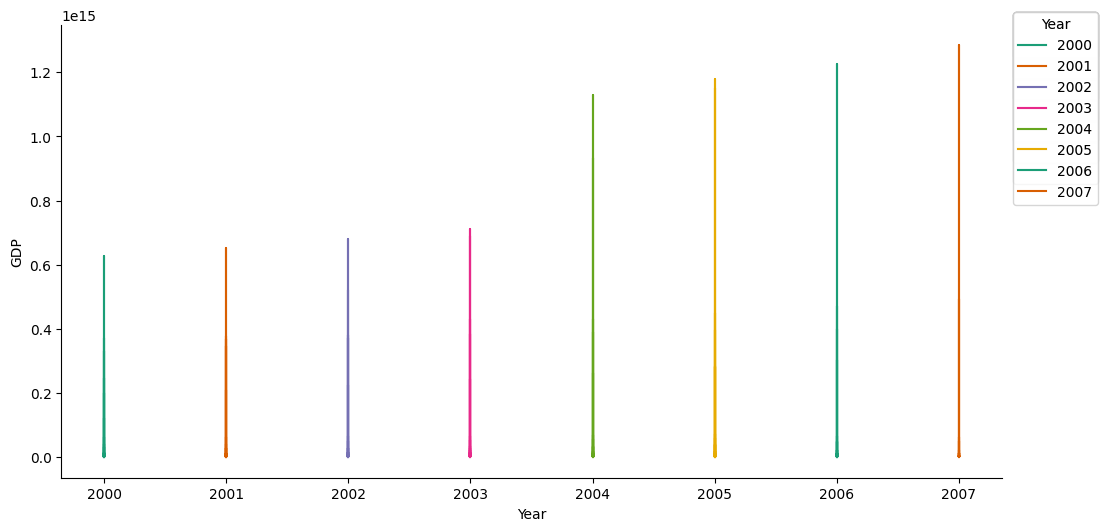

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['GDP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_long.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('GDP')

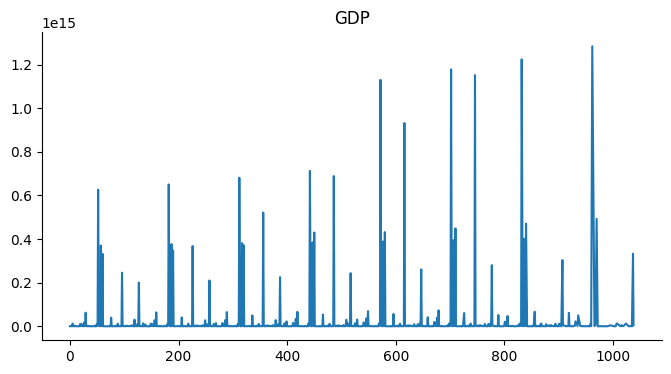

In [ ]:
from matplotlib import pyplot as plt
data_long['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)